### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as part of Module 1 - EDA, Visualisation techniques

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### Import the necessary packages

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

### Read the 3 datasets into dataframes

In [4]:
rating = pd.read_csv('Data.csv')
rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
movie = pd.read_csv('item.csv')
movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
user = pd.read_csv('user.csv')
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### Apply info, shape, describe, and find the number of missing values in the data. 

In [7]:
# for rating dataframe
print(rating.info())
print(rating.shape)
print(rating.describe())
print(rating.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None
(100000, 4)
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08
user id      0
movie id   

In [8]:
# for movie dataframe
print(movie.info())
print(movie.shape)
print(movie.describe())
print(movie.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [9]:
# for user dataframe
print(user.info())
print(user.shape)
print(user.describe())
print(user.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None
(943, 5)
          user id         age
count  943.000000  943.000000
mean   472.000000   34.051962
std    272.364951   12.192740
min      1.000000    7.000000
25%    236.500000   25.000000
50%    472.000000   31.000000
75%    707.500000   43.000000
max    943.000000   73.000000
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


**Observations:**
1. There are no null observations for all the variables in all 3 dataframes (rating, movie, user)
2. There are 943 users who have rated movies, and in total they rated 10000 movies
3. The mean rating is lower than the median rating, showing that there is a negative skewness



### Finding the number of movies per genre using the item data

In [10]:
# keep only the genre columns
movie_genre = movie.drop(["movie id", "movie title", "release date"], axis=1)
movie_genre

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1677,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1678,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1679,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# apply logical on the movie_genre dataframe
movie_genre[movie_genre == 1].sum()

unknown          1.0
Action         251.0
Adventure      135.0
Animation       42.0
Childrens      122.0
Comedy         505.0
Crime          109.0
Documentary     50.0
Drama          725.0
Fantasy         22.0
Film-Noir       24.0
Horror          92.0
Musical         56.0
Mystery         61.0
Romance        247.0
Sci-Fi         101.0
Thriller       251.0
War             71.0
Western         27.0
dtype: float64

**Insights:**
The Drama genre has the most number of movies (725 movies), and the unknown genre has the least number of movies (1 movie)


### Dropping the movie with the Unknown genre

In [12]:
# drop the row with the movie of unknown genre
movie.drop(movie[movie["unknown"] == 1].index, inplace = True)
movie

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Finding the movies that have more than one genre


In [13]:
# drop unnecessary columns
movie2 = movie.drop(["movie id","release date"], axis=1)
movie2.head()

,movie title,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [14]:
no_of_genre = movie2.sum(axis=1)
# create a df of the movie titles and the respectives no of genres they have
movie_no_of_genre = pd.DataFrame([movie2["movie title"], no_of_genre]).rename({"Unnamed 0":"number of genre"}).T
movie_no_of_genre.head()

,movie title,number of genre
0,Toy Story,3
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3


In [15]:
# table with no of movies with >1 genre
movie_no_of_genre[movie_no_of_genre["number of genre"] > 1]

,movie title,number of genre
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


In [16]:
# count of no of movies with >1 genre
print("The number of movies with more than 1 genre is",
      movie_no_of_genre[movie_no_of_genre["number of genre"] > 1]["movie title"].count())

The number of movies with more than 1 genre is 849


**Insights:**
There are 849 movies with more than 1 genres


### Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' 


In [17]:
# add release year as a column in the movie dataframe
movie["release year"] = movie["release date"].str.split('-', expand=True)[2]
movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1995


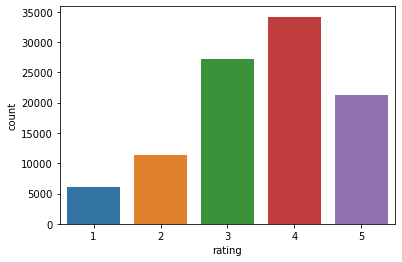

In [18]:
# plot of ratings
sns.countplot(rating.rating)

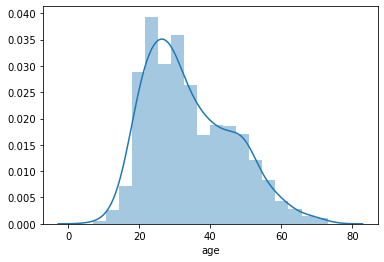

In [19]:
# plot of age
sns.distplot(user.age)

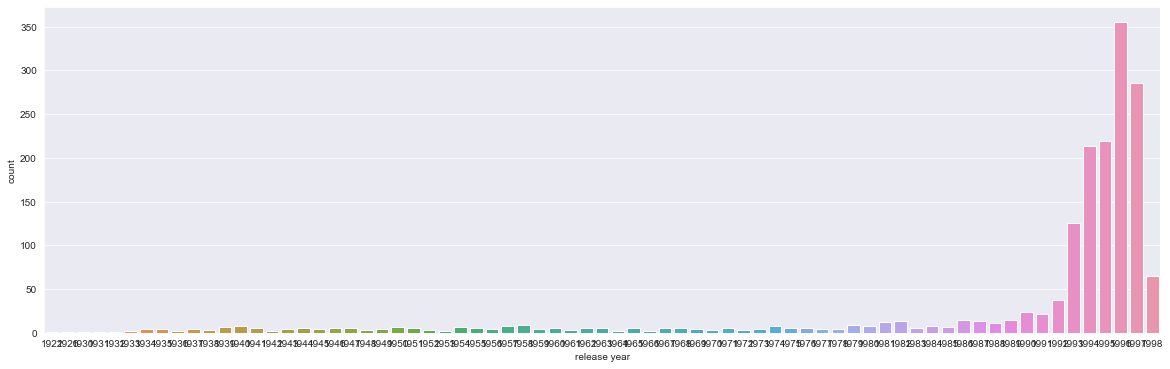

In [20]:
# plot of release year
sns.set({"figure.figsize":(20,6)})
sns.countplot(movie["release year"])

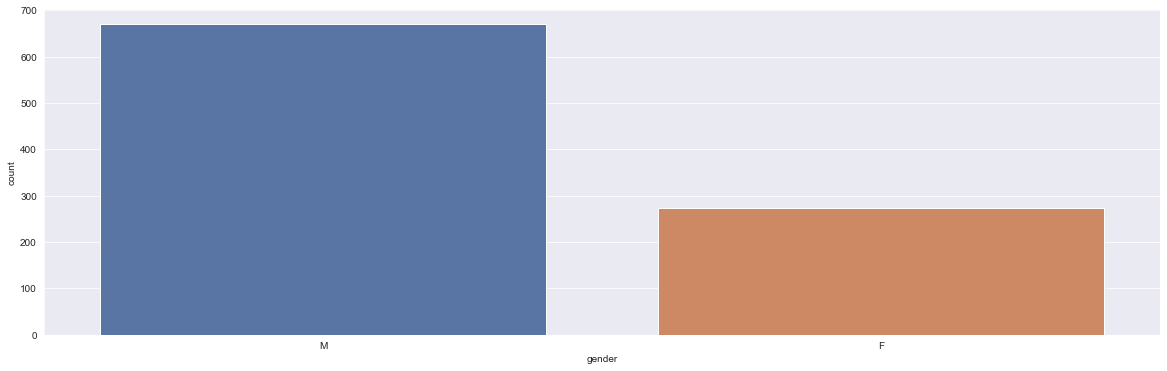

In [21]:
# plot of gender
sns.countplot(user.gender)

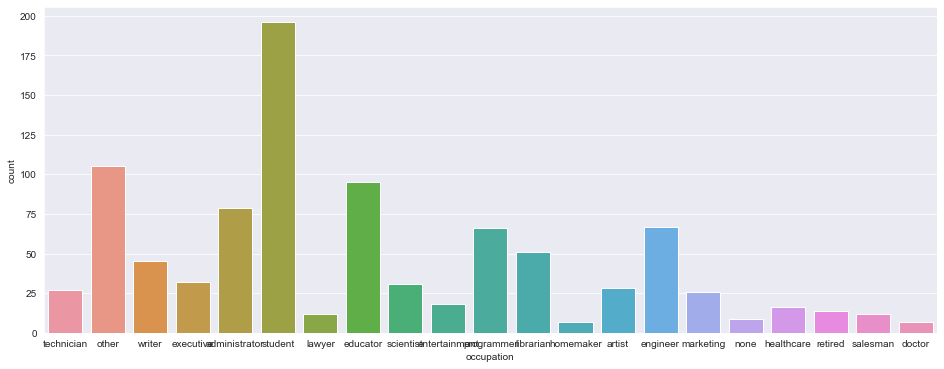

In [22]:
# plot of occupation
sns.set({'figure.figsize': (16,6)})
sns.countplot(user.occupation)

### Visualize how popularity of genres has changed over the years


In [23]:
# drop unnecessary columns
movie3 = movie.drop(["movie id", "movie title", "release date"], axis=1)
movie3.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1995
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1995
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1995


In [24]:
# assign the value of 1 to each movie (aka each row)
movie3["total"] = 1
movie3.head()

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release year,total
0,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1995,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995,1
3,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1995,1
4,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1995,1


In [25]:
movie_by_year = movie3.groupby("release year").sum()
movie_by_year

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
release year,,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,214
1995,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,219
1996,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,355


In [26]:
# to change all the values in the genre columns to percentage of total movies

list_of_genres = ['unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


for genre in list_of_genres:
    movie_by_year[genre] = (movie_by_year[genre]/movie_by_year["total"])* 100
movie_by_year

# or can use the div function
# new =(movie_by_year.div(movie_by_year["total"], axis= 0) * 100)
# new

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
release year,,,,,,,,,,,,,,,,,,,,
1922,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1926,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1930,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
1931,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,1
1932,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,100.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,14.018692,6.074766,1.869159,7.009346,38.317757,3.738318,4.205607,45.327103,1.401869,0.000000,3.738318,0.934579,0.934579,16.355140,3.271028,11.682243,3.271028,2.803738,214
1995,0.0,18.264840,10.045662,2.739726,9.589041,28.767123,5.022831,2.283105,40.639269,1.369863,0.456621,6.392694,1.369863,2.283105,16.894977,6.849315,17.808219,2.283105,0.913242,219
1996,0.0,12.394366,6.760563,2.535211,5.915493,30.422535,5.915493,5.070423,47.887324,1.690141,0.281690,3.098592,2.535211,1.690141,10.704225,4.225352,13.239437,2.535211,0.563380,355


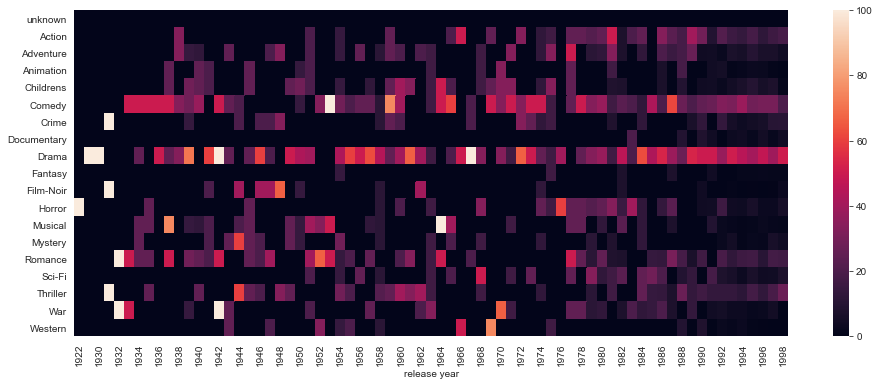

In [27]:
sns.heatmap(movie_by_year.drop(["total"],axis=1).T)

**Insights:**
- Drama genres is the most popular genre. It was especially popular in its early years (1920s to 1940s). 
- Action genre was not popular in the earlier years, but has gained popularity after 1970s.
- Romance genre used to be popular, but since 1970s, has seen a decline in popularity


### Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times


In [28]:
rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [29]:
no_of_ratings = rating.groupby("movie id")["user id"].count()
no_of_ratings

movie id
1       452
2       131
3        90
4       209
5        86
       ... 
1678      1
1679      1
1680      1
1681      1
1682      1
Name: user id, Length: 1682, dtype: int64

In [30]:
mean_rating = rating.groupby("movie id")["rating"].mean()
mean_rating

movie id
1       3.878319
2       3.206107
3       3.033333
4       3.550239
5       3.302326
          ...   
1678    1.000000
1679    3.000000
1680    2.000000
1681    3.000000
1682    3.000000
Name: rating, Length: 1682, dtype: float64

In [31]:
# combine to form a dataframe
movie_ratings = pd.merge(no_of_ratings,mean_rating,how='outer',on='movie id')
movie_ratings = movie_ratings.rename(columns = {"user id":"count"})
movie_ratings.head()

,count,rating
movie id,,
1,452,3.878319
2,131,3.206107
3,90,3.033333
4,209,3.550239
5,86,3.302326


In [32]:
# filter only for movies with above 100 ratings
movie_ratings = movie_ratings[movie_ratings["count"] > 100]
movie_ratings

,count,rating
movie id,,
1,452,3.878319
2,131,3.206107
4,209,3.550239
7,392,3.798469
8,219,3.995434
...,...,...
926,101,2.702970
928,104,3.115385
1016,137,3.459854


In [33]:
# sort average ratings
movie_ratings.sort_values("rating", ascending=False, inplace=True)
movie_ratings

,count,rating
movie id,,
408,112,4.491071
318,298,4.466443
169,118,4.466102
483,243,4.456790
64,283,4.445230
...,...,...
358,143,2.615385
260,127,2.574803
325,128,2.546875


In [34]:
# add movie title
movie_ratings2 = pd.merge(movie_ratings, movie[["movie id","movie title"]], how = "right", on="movie id")

In [35]:
# slice for top 25 rated movies
movie_ratings2.head(25)

,movie id,count,rating,movie title
0,408,112.0,4.491071,"Close Shave, A"
1,318,298.0,4.466443,Schindler's List
2,169,118.0,4.466102,"Wrong Trousers, The"
3,483,243.0,4.456790,Casablanca
4,64,283.0,4.445230,"Shawshank Redemption, The"
5,603,209.0,4.387560,Rear Window
6,12,267.0,4.385768,"Usual Suspects, The"
7,50,583.0,4.358491,Star Wars
8,178,125.0,4.344000,12 Angry Men
9,134,198.0,4.292929,Citizen Kane
